# Multiple Linear Regression - Real State

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Steps to implement Multiple Linear Regression
- Step #1 Data Loading
- Step #2 Understanding and visualising the data
- Step #3 Prepare the data for modeling
- Step #4 Create and prepare models for train and test
- Step #5 Training the model
- Step #6 Residual analysis
- Step #7 Predictions and Evaluation on the Test Set

## Step #1 Data loading
- Load the CSV
- Print the head

In [106]:
housing_df = pd.read_csv("Housing.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step #2 Understanding the type and categories of data
- Printing the nunique
- Printing the null values
- Printing the shape of DataSet
- Printing the info

In [107]:
print("-------\nUnique value check")
print(housing_df.nunique())
print("-------\nNull Value check")
print(housing_df.isnull().sum())
print("---------\nDataSet Shape")
print(housing_df.shape)
print("---------\nDataSet info")
housing_df.info()

-------
Unique value check
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64
-------
Null Value check
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
---------
DataSet Shape
(545, 13)
---------
DataSet info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              5

In [108]:
housing_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


### Categorising the data in Continuous and categorical columns
- Create an array of continuous columns
- Create an array of Categorical columns

In [109]:
con_col = ["price", "area"]
cat_col = ["bedrooms", "bathrooms", "stories", 
           "mainroad", "guestroom", "basement", 
           "hotwaterheating", "airconditioning", "parking",
          "prefarea", "furnishingstatus"]

### Visualising the data
- Create histplot or scatterplot for continuos columns
- Create countplot or box plots for categorical columns

Text(0.5, 1.0, 'Price vs Area')

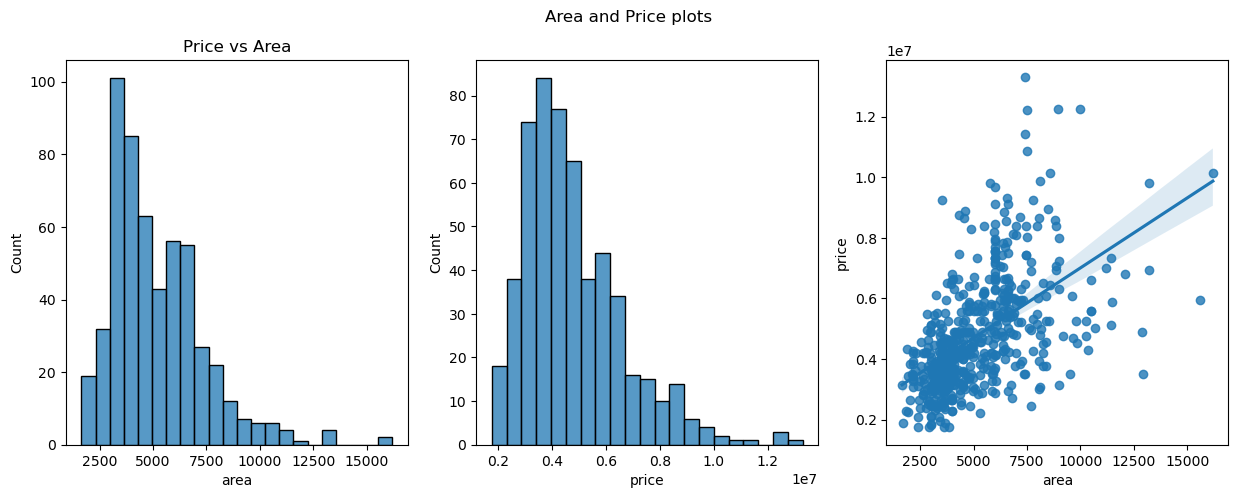

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Area and Price plots')

# Area histplot
sns.histplot(ax=axes[0], data=housing_df, x="area")
axes[0].set_title("Area - Count")

# Price histplot
sns.histplot(ax=axes[1], data=housing_df, x="price")
axes[0].set_title("Price - Count")


# Area vs price scatterplot
sns.regplot(ax=axes[2], data=housing_df, x="area", y="price")
axes[0].set_title("Price vs Area")

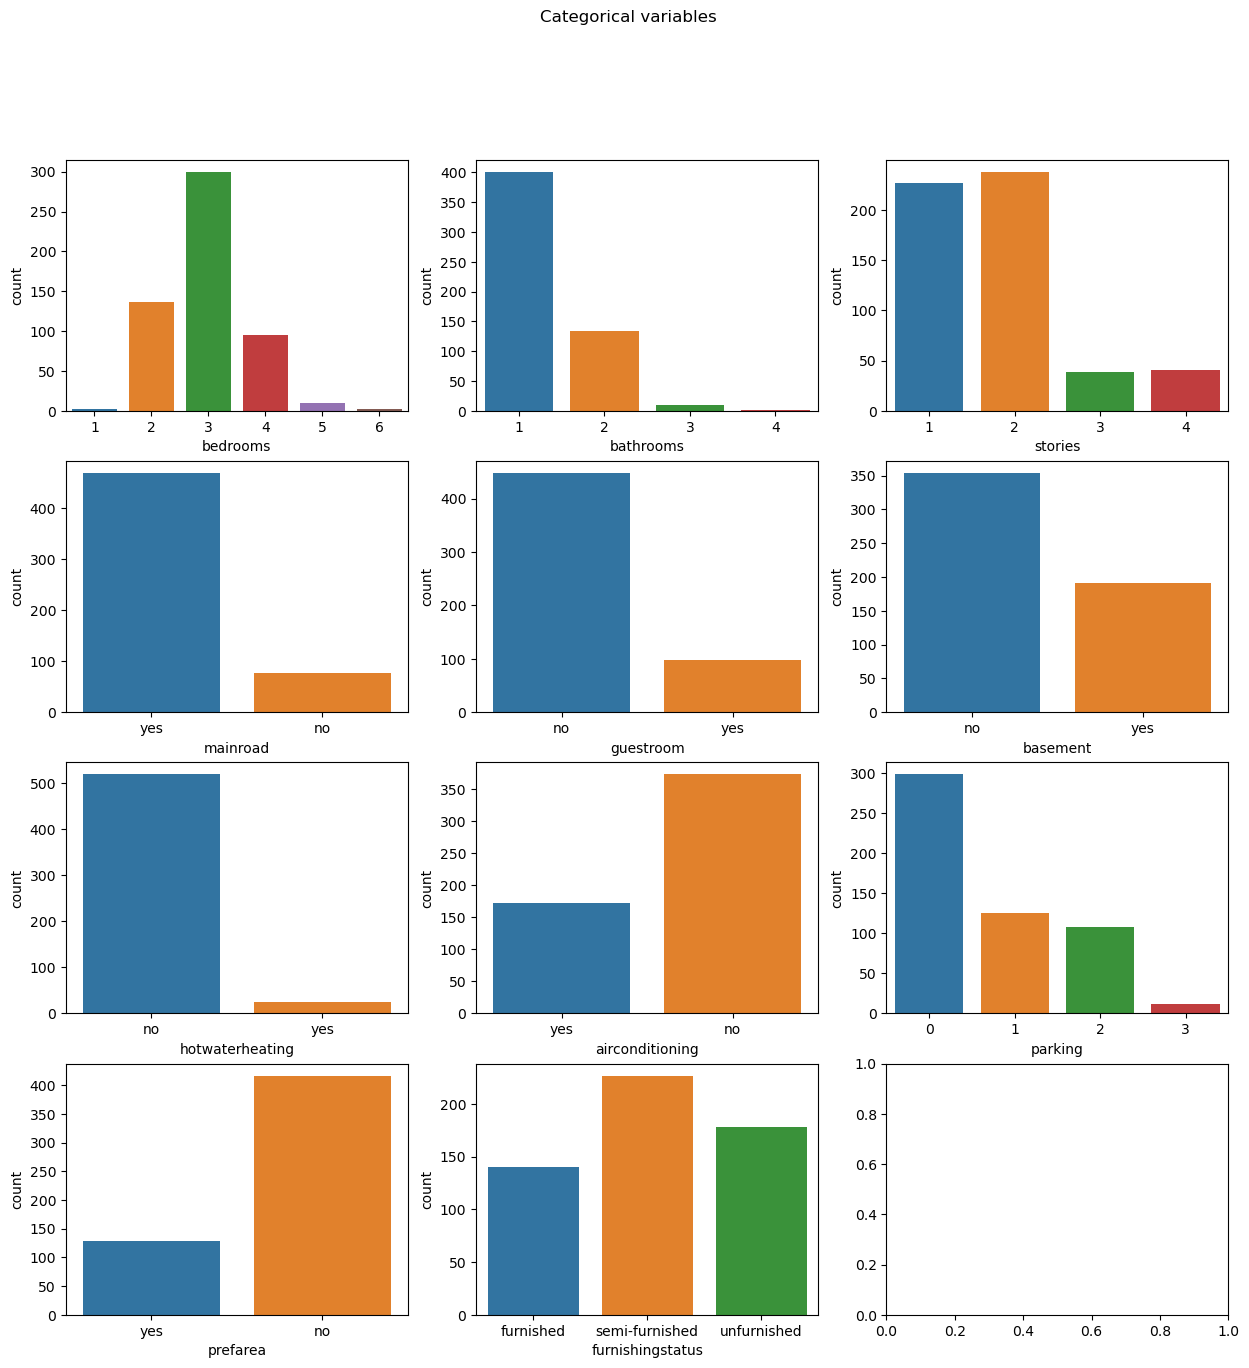

In [111]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle("Categorical variables")

for index, col in enumerate(cat_col):
    plotRow = int(index / 3)
    column = index % 3
    sns.countplot(ax=axes[plotRow][column], data=housing_df, x=col)

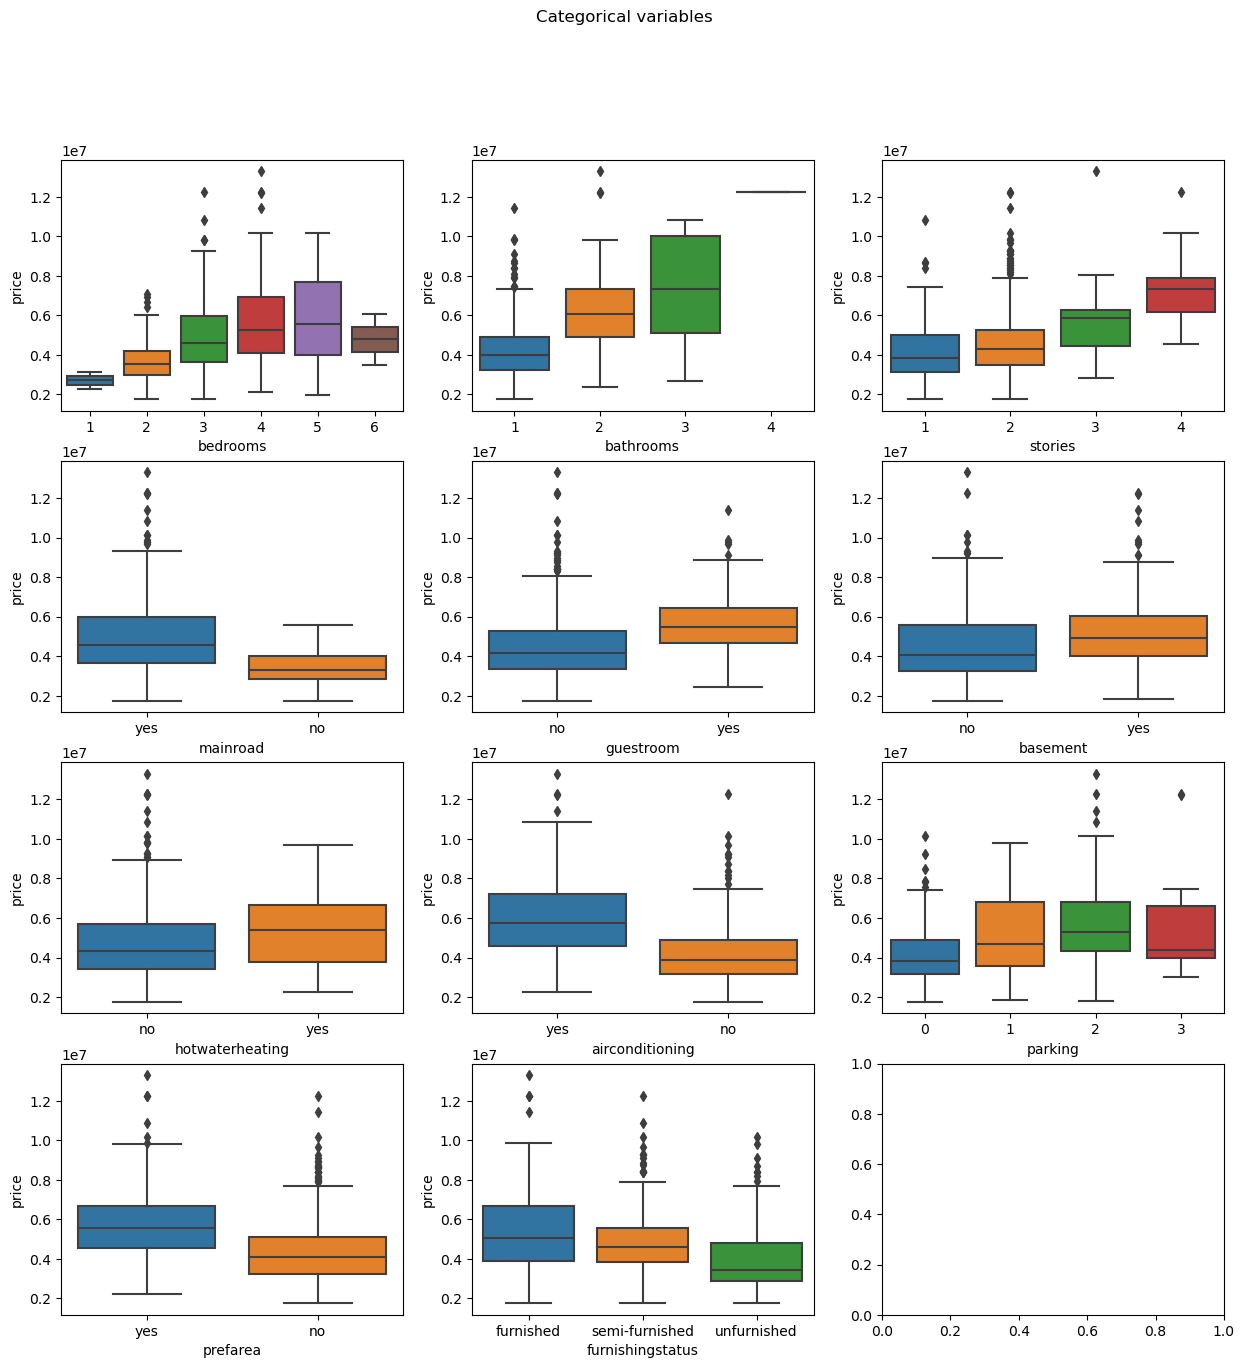

In [112]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle("Categorical variables")

for index, col in enumerate(cat_col):
    plotRow = int(index / 3)
    column = index % 3
    sns.boxplot(ax=axes[plotRow][column], data=housing_df, x=col, y="price")

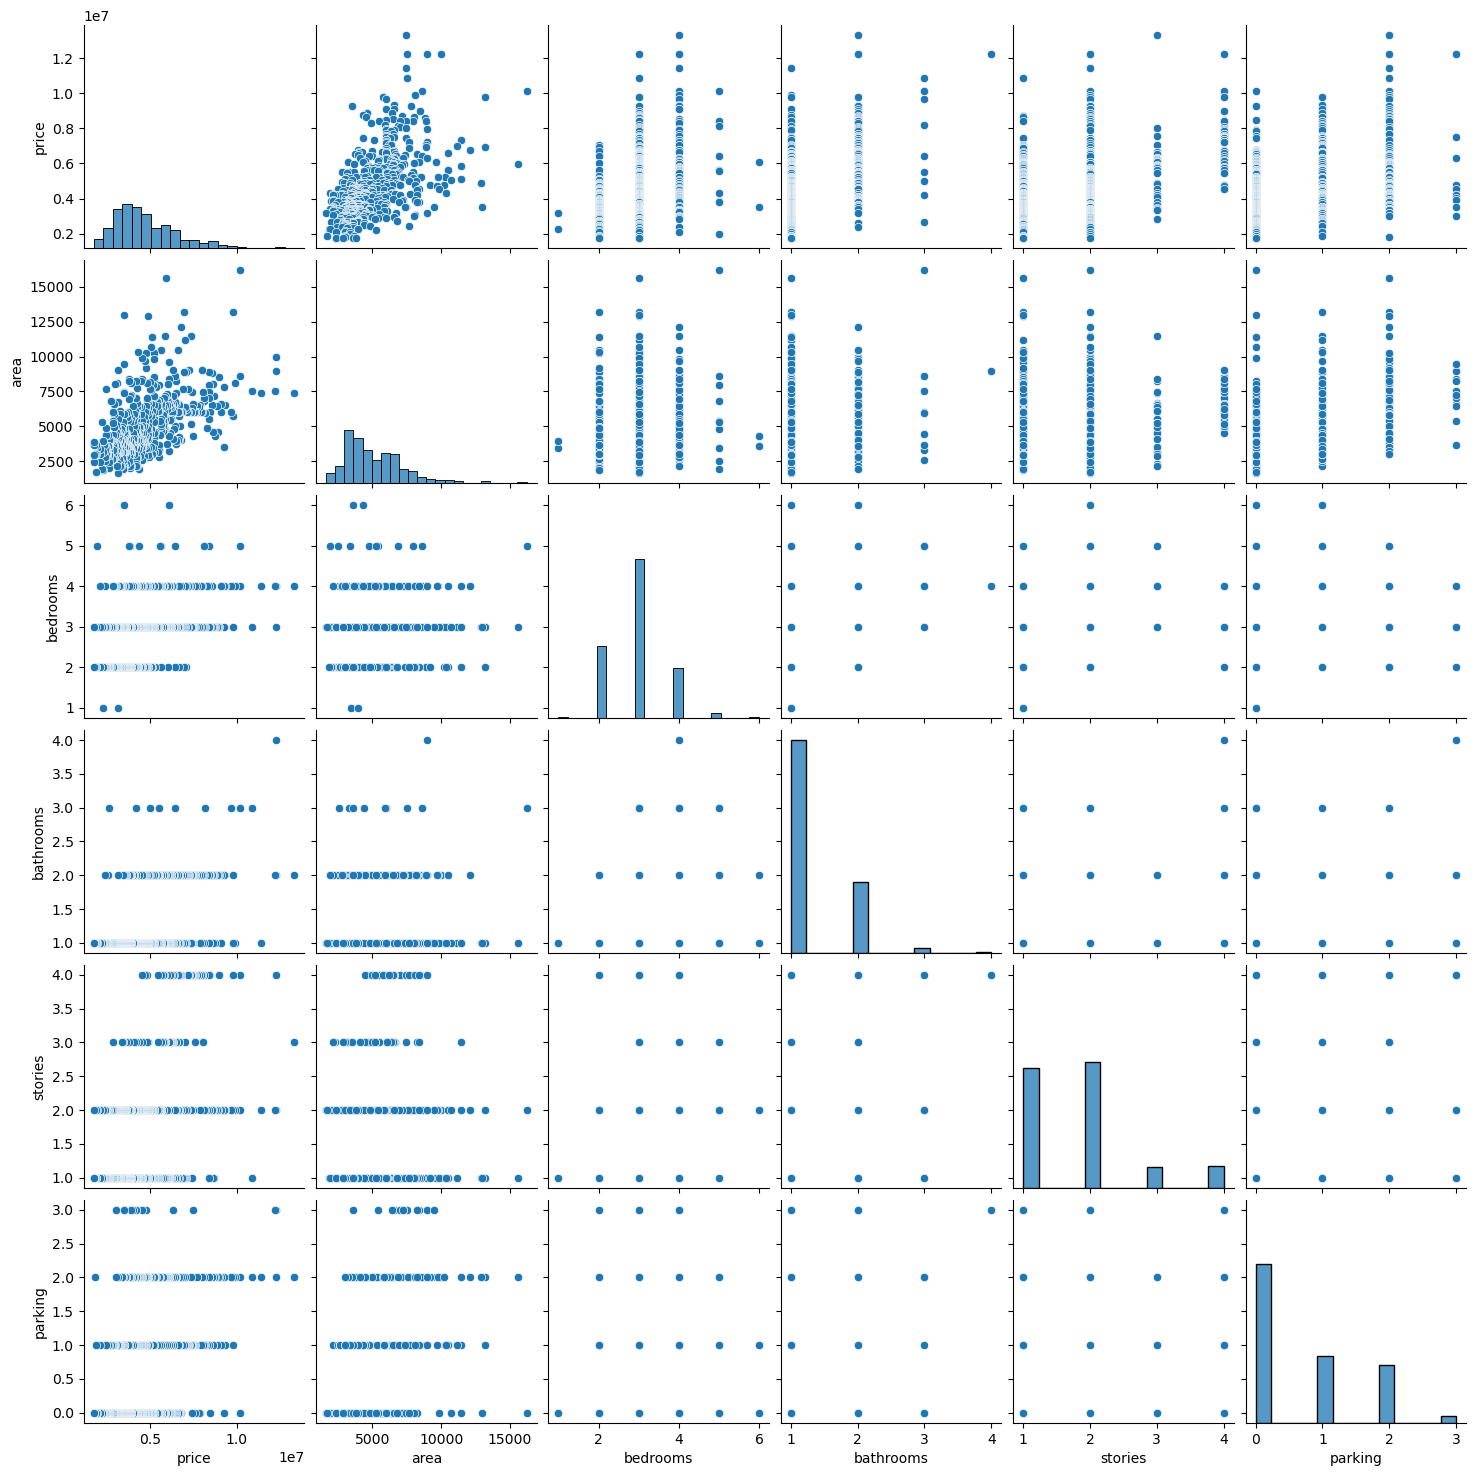

In [113]:
sns.pairplot(housing_df)
plt.show()

## Step #3 Prepare the data for modeling
- Encoding
    - All non numeric columns to be converted to numeric
    - Converting binary variables to 1/0
    - Other categorical varaibles to dummy vars
- Splitting into train and test
- Rescalling of the variables

### Converting the binary variables to 1/0
- List out all the columns with Yes/No or binary values
- If the value is Yes then change it to 1 else change it to 0 if No

In [114]:
bin_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
other_cat_cols = ["furnishingstatus"]

#### converting Yes/No to 1/0

In [115]:
# converting Yes/No to 1/0

housing_updated_df = housing_df
for col in bin_cols:
    housing_updated_df[col] = housing_updated_df[col].str.lower().map({"yes": 1, "no": 0})

housing_updated_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


### Converting FurnishingStatus to dummyCol
- `00` Furnished
- `01` unfurnished
- `10` semi-furnished

In [116]:
# Creating dummy variables (columns)
furnishingStatus = pd.get_dummies(housing_updated_df["furnishingstatus"], drop_first=True)

# Concatinating dummy vars to orignial dataSet
housing_updated_df = pd.concat([housing_updated_df, furnishingStatus], axis=1)

# Removing the actual cat column
housing_updated_df = housing_updated_df.drop(["furnishingstatus"], axis=1)

housing_updated_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Step #4 Create and prepare models for train and test
- Split the data in train and test models
- Rescale the model either in
    - MinMax scale (normalisation): between 0 and 1
    -> `(x - xmin) / (xmax - xmin)`
    - Standardisation (mean 0, sigma 1)
    -> `(x - mean) / sigma`
    

In [187]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as st_api
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Split the train and test data

In [168]:
housing_train_df, housing_test_df = train_test_split(housing_updated_df, train_size=0.7, random_state=100)
print("train", housing_train_df.shape)
print("test", housing_test_df.shape)

train (381, 14)
test (164, 14)


### Rescaling the model

To fit the model there are three functions in MinMaxScaler
- `fit()`: learns xmin and xmax
- `transform()`: converts value to (x - xmin) / (xmax - xmin)
- `fit_transform()`: First it fits the data and then transforms it

In [169]:
#1 Instantiate an object
minMaxScale = MinMaxScaler()

# Create the list of numeric variables
num_var = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]


#2 Fit on data
housing_train_df[num_var] = minMaxScale.fit_transform(housing_train_df[num_var])


housing_train_df.describe()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000,381.000
mean,0.260,0.289,0.386,0.136,0.269,0.856,0.171,0.352,0.052,0.299,0.242,0.234,0.415,0.325
std,0.158,0.181,0.147,0.237,0.295,0.352,0.377,0.478,0.223,0.459,0.286,0.424,0.493,0.469
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.152,0.155,0.200,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.221,0.234,0.400,0.000,0.333,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.345,0.398,0.400,0.500,0.333,1.000,0.000,1.000,0.000,1.000,0.333,0.000,1.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Step #5 Training the model

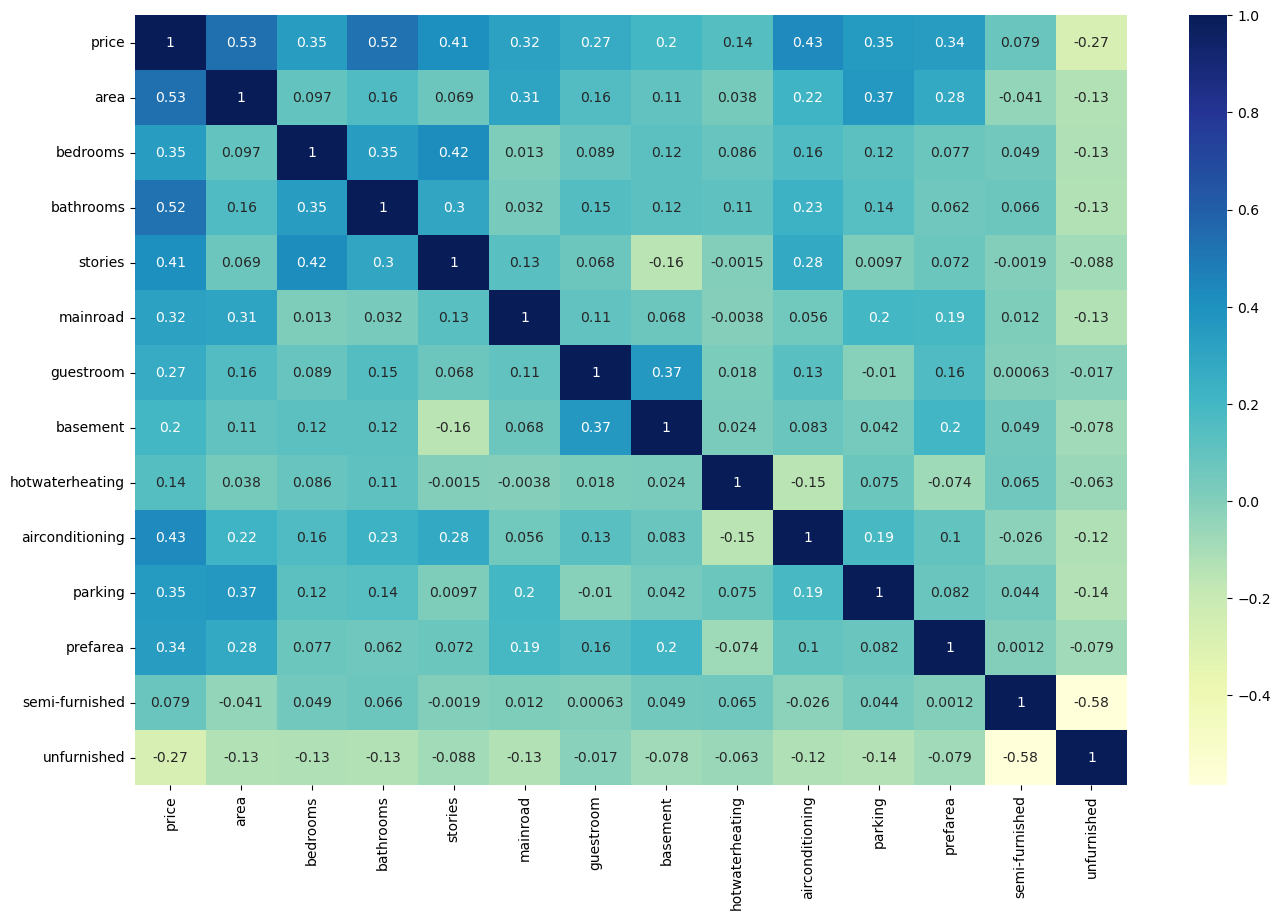

In [170]:
plt.figure(figsize=(16,10))
sns.heatmap(housing_train_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [171]:
# Create y_train and X_train

y_train = housing_train_df.pop("price")
X_train = housing_train_df

## Ways to create model is
- Technique 1 - Add one variable at a time 
- Technique 2 - Add all variables at once and remove the variables later

________________
### Technique 1 - Add one variable at a time
#### Starting the mode creation with only area

In [172]:
# add a constant
X_train_sm = st_api.add_constant(X_train["area"])

# create first model
lr_train = st_api.OLS(y_train, X_train_sm)

# fit the model
lr_train_model = lr_train.fit()

# params
lr_train_model.params

const   0.127
area    0.462
dtype: float64

- Value of R-squared is 28%
- Value of P is 0.00
- F-statistics is 3.15e-29
- coef of area is +ve

In [173]:
lr_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.15e-29
Time:                        20:36:18   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### adding the variable bathrooms to existing model

In [174]:
# add another variable bathrooms
X_train_sm = X_train[["area", "bathrooms"]]
X_train_sm = st_api.add_constant(X_train_sm)

# create model
lr_train = st_api.OLS(y_train, X_train_sm)

# fit the model
lr_train_model = lr_train.fit()

# params
lr_train_model.params

const       0.105
area        0.398
bathrooms   0.298
dtype: float64

On Adding a new variable bathrooms

- Value of R-squared is increased to 48%
- Value of P of all variables are 0.00
- F-statistics is 2.51e-54
- coef of both variable is +ve

In [175]:
lr_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.51e-54
Time:                        20:36:28   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### adding the variable bedrooms to existing model

In [176]:
# add another variable bedrooms
X_train_sm = X_train[["area", "bathrooms", "bedrooms"]]
X_train_sm = st_api.add_constant(X_train_sm)

# create model
lr_train = st_api.OLS(y_train, X_train_sm)

# fit the model
lr_train_model = lr_train.fit()

# params
lr_train_model.params

const       0.041
area        0.392
bathrooms   0.260
bedrooms    0.182
dtype: float64

On Adding a new variable bedrooms
- Value of R-squared is increased to 50%
- Value of P is 0.00
- Value of P of constant has not 0
- F-statistics is 3.12e-57
- coef of all variables are +ve

In [177]:
lr_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.12e-57
Time:                        20:36:33   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__________
### Technique 2 - Add all variables at once and remove the variables later

In [178]:
# build model with all variables
X_train_sm = st_api.add_constant(X_train)

# create model
lr = st_api.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           8.83e-83
Time:                        20:36:36   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the VIF

VIF = 1 / (1-R^2)

If VIF is greater than equal to 5 then we should remove it.

5 =  1 / (1-R^2) <br>
1 - R^2 = 0.2 <br>
R^2 = 0.8 -> Very high

In [179]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,7.330
4,mainroad,6.020
0,area,4.670
3,stories,2.700
11,semi-furnished,2.190
9,parking,2.120
6,basement,2.020
12,unfurnished,1.820
8,airconditioning,1.770
2,bathrooms,1.670


#### Relationship between p-value and VIF
- High p-value and high VIF -> Remove these
- High - Low
    - High p-value and low VIF -> Remove these first
    - Low p-value and high VIF -> Remove these after above
- Low p-value and low VIF -> Keep these

Bedrooms has a very VIF -> 7.33 which is more than 5. Also the p-value is 0.206 which is more that 0.05. <br>
So it falls under High p-value and high VIF

In [180]:
X_removed = X_train.drop("bedrooms", axis=1)

# build model with bedrooms removed
X_train_sm = st_api.add_constant(X_removed)

# create model
lr = st_api.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.35e-83
Time:                        20:36:46   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0351      0.017      2.032      0.043       0.001       0.069
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
semi-furnished      0.0008      0.012      0.067      0.947      -0.022       0.024
unfurnished        -0.0318      0.013     -2.504      0.013      -0.057      -0.007
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculate the VIF without bedrooms

In [181]:
vif = pd.DataFrame()
vif["Features"] = X_removed.columns
vif["VIF"] = [variance_inflation_factor(X_removed.values, i) for i in range(X_removed.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,mainroad,5.530
0,area,4.550
2,stories,2.240
8,parking,2.110
10,semi-furnished,1.970
5,basement,1.900
7,airconditioning,1.770
11,unfurnished,1.620
1,bathrooms,1.610
9,prefarea,1.510


semi-furnished has High p-value and low VIF. So we will remove the semi-furnished now

In [182]:
X_removed = X_removed.drop("semi-furnished", axis=1)

# build model with bedrooms removed
X_train_sm = st_api.add_constant(X_removed)

# create model
lr = st_api.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.73e-84
Time:                        20:37:32   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif = pd.DataFrame()
vif["Features"] = X_removed.columns
vif["VIF"] = [variance_inflation_factor(X_removed.values, i) for i in range(X_removed.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.790
0,area,4.550
2,stories,2.230
8,parking,2.100
5,basement,1.870
7,airconditioning,1.760
1,bathrooms,1.610
9,prefarea,1.500
4,guestroom,1.460
10,unfurnished,1.330


Now, we can either use this model (as all VIF are below 5 and p-values are below 0.05) or can remove the mainroad. <br>

Proceeding with removing the basement

In [184]:
X_removed = X_removed.drop("basement", axis=1)

# build model with bedrooms removed
X_train_sm = st_api.add_constant(X_removed)

# create model
lr = st_api.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.13e-84
Time:                        20:37:59   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0428      0.014      2.958      0.003       0.014       0.071
area                0.2335      0.030      7.772      0.000       0.174       0.293
bathrooms           0.2019      0.021      9.397      0.000       0.160       0.244
stories             0.1081      0.017      6.277      0.000       0.074       0.142
mainroad            0.0497      0.014      3.468      0.001       0.022       0.078
guestroom           0.0402      0.013      3.124      0.002       0.015       0.065
hotwaterheating     0.0876      0.022      4.051      0.000       0.045       0.130
airconditioning     0.0682      0.011      6.028      0.000       0.046       0.090
parking             0.0629      0.018      3.482      0.001       0.027       0.098
prefarea            0.0637      0.012      5.452      0.000       0.041       0.087
unfurnished        -0.0337      0.010     -3.295      0.001      -0.054      -0.014
==============================================================================
Omnibus:                       97.054   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.034
Skew:                           1.124   Prob(JB):                     1.18e-70
Kurtosis:                       6.902   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
vif = pd.DataFrame()
vif["Features"] = X_removed.columns
vif["VIF"] = [variance_inflation_factor(X_removed.values, i) for i in range(X_removed.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,mainroad,4.550
0,area,4.540
2,stories,2.120
7,parking,2.100
6,airconditioning,1.750
1,bathrooms,1.580
8,prefarea,1.470
9,unfurnished,1.330
4,guestroom,1.300
5,hotwaterheating,1.120


## Step #6 Residual analysis

In [162]:
y_train_pred = lr_model.predict(X_train_sm)

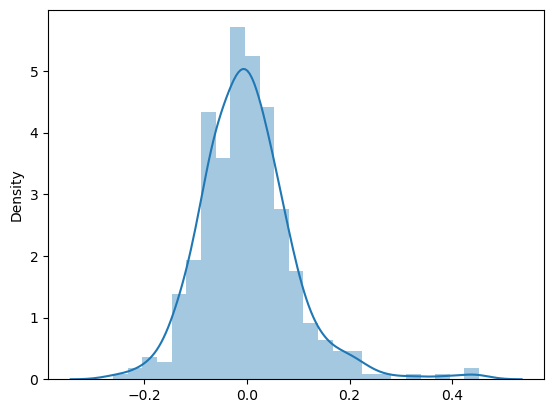

In [163]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

## Step #7 Predictions and Evaluation on the Test Set

- You never Fit your scaler on the `test set`
- You Fit scaler only on `training set`

In [164]:
num_var = ["area", "bedrooms", "bathrooms", "stories", "parking", "price"]
housing_test_df[num_var] = minMaxScale.transform(housing_test_df[num_var])

housing_test_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.230,0.092,0.400,0.000,0.333,1,0,0,0,0,0.000,1,1,0
54,0.485,0.366,0.400,0.500,0.333,1,1,0,0,1,0.333,0,1,0
171,0.303,0.742,0.400,0.000,0.000,1,0,0,0,0,0.333,1,1,0
244,0.242,0.307,0.400,0.000,0.333,1,1,1,0,0,0.000,1,1,0
268,0.228,0.274,0.600,0.000,0.333,1,0,0,0,1,0.000,0,1,0


In [165]:
housing_test_df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000,164.000
mean,0.263,0.299,0.409,0.159,0.268,0.866,0.195,0.348,0.030,0.354,0.205,0.238,0.421,0.329
std,0.172,0.212,0.148,0.281,0.276,0.342,0.398,0.478,0.172,0.480,0.289,0.427,0.495,0.471
min,0.006,-0.016,0.200,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.142,0.148,0.400,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.226,0.260,0.400,0.000,0.333,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.347,0.397,0.400,0.500,0.333,1.000,0.000,1.000,0.000,1.000,0.333,0.000,1.000,1.000
max,0.909,1.264,0.800,1.500,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [166]:
y_test = housing_test_df.pop("price")
X_test = housing_test_df

In [167]:
# Add a constant

X_test_sm = st_api.add_constant(X_test)
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.092,0.400,0.000,0.333,1,0,0,0,0,0.000,1,1,0
54,0.366,0.400,0.500,0.333,1,1,0,0,1,0.333,0,1,0
171,0.742,0.400,0.000,0.000,1,0,0,0,0,0.333,1,1,0
244,0.307,0.400,0.000,0.333,1,1,1,0,0,0.000,1,1,0
268,0.274,0.600,0.000,0.333,1,0,0,0,1,0.000,0,1,0


### Drop the columns from Test model set
As we have dropped `bedrooms`, `semi-furnished` and `basement` from training model set so we will drop the same from test model as well

In [186]:
X_test_sm = X_test_sm.drop(["bedrooms", "semi-furnished", "basement"], axis=1)

In [188]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [189]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.660134403021964

______________________________________
## Automated feature selection using the RFE

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### Running RFE with output number of variables equal to 10

Steps
- Create a LinearRegression Model
- Fit the training model
- Give the RFE feature limit (in our case it is 10)
- Run RFE.fit on training model

In [207]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [208]:
# If rfe support is True then these columns are good to be selected

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [209]:
supported_col = X_train.columns[rfe.support_]
unsupported_col = X_train.columns[~rfe.support_]

### Building models using statsmodel for detailed statistics

In [210]:
X_train_rfe = X_train[supported_col]
X_train_rfe_sm = st_api.add_constant(X_train_rfe)

In [211]:
# Run the linear model
lm = st_api.OLS(y_train, X_train_rfe_sm).fit()

In [212]:
# Linear model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.28e-82
Time:                        21:08:49   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
1,bedrooms,5.850
4,mainroad,5.530
0,area,4.660
3,stories,2.450
8,parking,2.110
7,airconditioning,1.750
2,bathrooms,1.640
9,prefarea,1.470
5,guestroom,1.300
6,hotwaterheating,1.130


### Dropping the feature manually

- Notice that bedroom has p-value 0.07 which is greater than 0.05 and VIF is 5.850
- Dropping the bedrooms

In [216]:
X_train_rfe = X_train_rfe.drop(["bedrooms"], axis=1)

X_train_rfe_sm = st_api.add_constant(X_train_rfe)

# Run the linear model
lm = st_api.OLS(y_train, X_train_rfe_sm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           6.67e-83
Time:                        21:12:04   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculate the VIF again

In [218]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
0,area,4.520
3,mainroad,4.260
2,stories,2.120
7,parking,2.100
6,airconditioning,1.750
1,bathrooms,1.580
8,prefarea,1.470
4,guestroom,1.300
5,hotwaterheating,1.120


### Residual analysis of training model set

Text(0.5, 0, 'Errors')

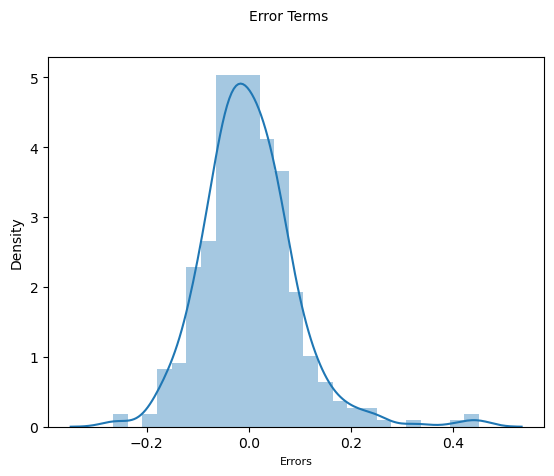

In [222]:
y_train_rfe_pred = lm.predict(X_train_rfe_sm)
res = y_train - y_train_rfe_pred

fig = plt.figure()
sns.distplot(res)
fig.suptitle("Error Terms", fontsize=10)
plt.xlabel("Errors", fontsize=8)

## Making predictions
### Applying it to the test set

In [233]:
X_test_rfe = X_test
y_test_rfe = y_test

In [234]:
X_test_rfe_new = X_test[X_train_rfe.columns]

X_test_rfe_new_sm = st_api.add_constant(X_test_rfe_new)

In [241]:
y_test_pred_rfe = lm.predict(X_test_rfe_new_sm)

r2_score(y_true=y_test_rfe, y_pred=y_test_pred_rfe)

0.6481740917926485

## Model Evaluation

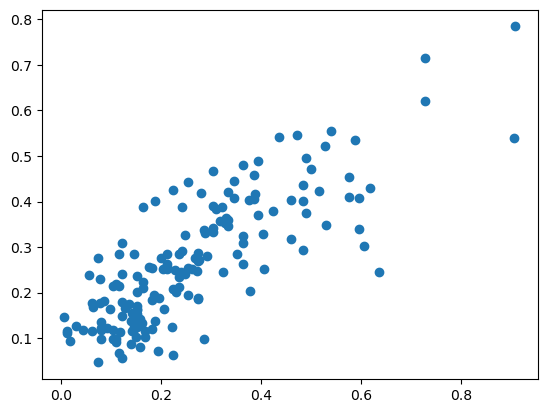

In [240]:
plt.scatter(y_test_rfe, y_test_pred_rfe)
plt.show()